In [262]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, math, re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../data/interim/game_by_game_stats.csv")

In [4]:
df.head()

,team_home,team_away,minutes_played_home,fg_home,fga_home,fg_pct_home,fg3_home,fg3a_home,fg3_pct_home,ft_home,...,off_rtg_away,def_rtg_away,pf_away,pts_away,home_team_away,home_team_bin_away,game_code,date,NBA_season,playoffs
0,TOR,DAL,240.0,44.0,91.0,0.484,11.0,27.0,0.407,17.0,...,106.2,115.2,17.0,107.0,TOR,False,201810260TOR,2018-10-26,18-19,0
1,TOR,BOS,240.0,43.0,92.0,0.467,13.0,35.0,0.371,14.0,...,103.3,115.6,27.0,101.0,TOR,False,201810190TOR,2018-10-19,18-19,0
2,TOR,CLE,240.0,45.0,92.0,0.489,14.0,33.0,0.424,12.0,...,103.7,115.6,25.0,104.0,TOR,False,201810170TOR,2018-10-17,18-19,0
3,TOR,CHO,240.0,50.0,87.0,0.575,15.0,39.0,0.385,12.0,...,105.8,126.8,14.0,106.0,TOR,False,201810220TOR,2018-10-22,18-19,0
4,TOR,MIN,240.0,46.0,89.0,0.517,11.0,32.0,0.344,9.0,...,107.9,115.1,17.0,105.0,TOR,False,201810240TOR,2018-10-24,18-19,0


In [5]:
df.columns

Index(['team_home', 'team_away', 'minutes_played_home', 'fg_home', 'fga_home',
       'fg_pct_home', 'fg3_home', 'fg3a_home', 'fg3_pct_home', 'ft_home',
       'fta_home', 'ft_pct_home', 'orb_home', 'drb_home', 'trb_home',
       'ast_home', 'stl_home', 'blk_home', 'tov_home', 'ts_pct_home',
       'efg_pct_home', 'fg3a_per_fga_pct_home', 'fta_per_fga_pct_home',
       'orb_pct_home', 'drb_pct_home', 'trb_pct_home', 'ast_pct_home',
       'stl_pct_home', 'blk_pct_home', 'tov_pct_home', 'usg_pct_home',
       'off_rtg_home', 'def_rtg_home', 'pf_home', 'pts_home', 'home_team_home',
       'home_team_bin_home', 'minutes_played_away', 'fg_away', 'fga_away',
       'fg_pct_away', 'fg3_away', 'fg3a_away', 'fg3_pct_away', 'ft_away',
       'fta_away', 'ft_pct_away', 'orb_away', 'drb_away', 'trb_away',
       'ast_away', 'stl_away', 'blk_away', 'tov_away', 'ts_pct_away',
       'efg_pct_away', 'fg3a_per_fga_pct_away', 'fta_per_fga_pct_away',
       'orb_pct_away', 'drb_pct_away', 'trb_pct_away

### Model 1: Four Factors
    * Previously Tested Model Known as the Four Most Important Factors to Winning
    * Developed by Dean Oliver
    * Features Include:
        * eFG% : Shooting Success Rate Adjusted for the fact 3s are worth 50% more than 2s.
        * TOV% : Estimated Turnover per 100 Possessions
        * ORB% : How many offensive rebounds a team was able to gather (ie. how many possessions were extended of all rebounds available)
        * FT/FGA%: How often did a team get to the line with respect to their field goal attempts. Since the majority of free throws occur during a shot attempt, this metric measures how often a team's shot attempts led to a untimed scoring opportunity.

In [6]:
model_1_df = df.loc[:, ['efg_pct_home', 'tov_pct_home', 'orb_pct_home', 'fta_per_fga_pct_home', 'pts_home',
          'efg_pct_away', 'tov_pct_away', 'orb_pct_away', 'fta_per_fga_pct_away', 'pts_away']]

In [7]:
model_1_df.describe()

,efg_pct_home,tov_pct_home,orb_pct_home,fta_per_fga_pct_home,pts_home,efg_pct_away,tov_pct_away,orb_pct_away,fta_per_fga_pct_away,pts_away
count,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000,4286.000000
mean,0.532073,12.191857,22.752123,0.264100,110.938637,0.522045,12.245030,21.848087,0.255895,108.722585
std,0.065297,3.320380,7.111329,0.093043,12.587828,0.064252,3.429987,6.942859,0.089455,12.562443
min,0.301000,1.000000,2.300000,0.012000,69.000000,0.313000,1.900000,0.000000,0.032000,68.000000
25%,0.487000,9.900000,17.800000,0.198000,102.250000,0.478000,9.800000,17.000000,0.192000,100.000000
50%,0.531000,12.100000,22.500000,0.256000,111.000000,0.521000,12.200000,21.450000,0.247000,109.000000
75%,0.576000,14.300000,27.500000,0.320000,119.000000,0.564000,14.500000,26.375000,0.310000,117.000000
max,0.762000,25.400000,46.900000,0.790000,161.000000,0.758000,27.800000,47.100000,0.730000,168.000000


In [8]:
home_teams = model_1_df.iloc[:, :5]

In [9]:
away_teams = model_1_df.iloc[:, 5:10]

In [10]:
home_teams.columns = [col.replace("_home", "") for col in home_teams.columns] 
away_teams.columns = [col.replace("_away", "") for col in away_teams.columns] 

In [11]:
model_ready_df = pd.concat([home_teams, away_teams], ignore_index=True)

In [12]:
X = model_ready_df.loc[:, [col for col in model_ready_df.columns if col != "pts"]].values
Y = model_ready_df.loc[:, [col for col in model_ready_df.columns if col == "pts"]].values

In [13]:
X.shape

(8572, 4)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=17)

In [25]:
model_1 = LinearRegression(normalize=True)

In [26]:
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [27]:
model_1.score(X_test, y_test)

0.7219790387213555

In [28]:
predictions_whole = model_1.predict(X)

In [29]:
zip(Y, predictions_whole)

In [30]:
predictions = pd.DataFrame(zip(Y, predictions_whole), columns=["Score", "ŷ"], dtype=np.float64)

In [31]:
predictions["Mean_Squared_Error"] = ((predictions["Score"] - predictions["ŷ"])**2)**.5

In [32]:
predictions.Mean_Squared_Error.mean()

5.141226321793775

In [33]:
predictions.Mean_Squared_Error.median()

4.210879157337871

In [34]:
predictions.Mean_Squared_Error.describe()

count    8572.000000
mean        5.141226
std         4.210903
min         0.000198
25%         1.985486
50%         4.210879
75%         7.228125
max        48.039200
Name: Mean_Squared_Error, dtype: float64

In [35]:
model_1.coef_

array([[155.73805387,  -1.19651513,   0.38487036,  30.19113477]])

<AxesSubplot:>

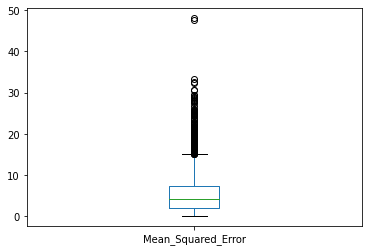

In [36]:
predictions.plot(y="Mean_Squared_Error", kind="box")

<AxesSubplot:>

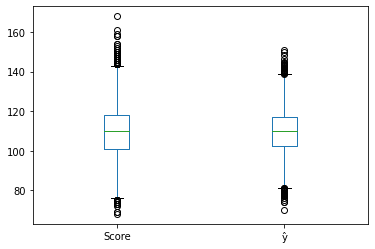

In [37]:
predictions.plot(y=["Score", "ŷ"], kind="box")

In [38]:
# Modeling Possessions

In [39]:
# 0.5 *  (FGA +.4(FTA) - 1.07(ORB / (ORB + Opp DRB)) * (TM FGA - TM FG) + TM TOV + // ((Opp FGA +.4(Opp FTA) - 1.07(Opp ORB / (Opp ORB + TM DRB)) * (Opp FGA - Opp FG) + Opp TOV ))

In [40]:
0.5 * (83 + (.4 * 32) - (1.07 * (11 / (11 + 29))) * (83 - 41) + 9 + (85 + (0.4 * (20)) - (1.07*(9 / (9+30))) * (85 - 42) + 10))

92.41190384615385

In [41]:
# reference: https://fansided.com/2015/12/21/nylon-calculus-101-possessions/#:~:text=How%20does%20stats.NBA.com,correctly%20factor%20in%20team%20rebounds.
def possessionCalculator(df):
    # equation used to properly account for rebounds as a factor of overall possessions.
    # original formula:
        # 0.5 * (FGA + (0.4*FTA) - 1.07*(ORB / (ORB  + Opp DRB)) * (FGA - FG) + TOV) + (Opp FGA + (0.4*Opp FTA) - 1.07*(Opp ORB / (Opp ORB + DRB)) * (Opp FGA - Opp FG) + Opp TOV)
    vars_ = ['fg_home', 'fga_home', 'fta_home', 'orb_home', 'drb_away', 'tov_home',
             'fg_away', 'fga_away', 'fta_away', 'orb_away', 'drb_home', 'tov_away']
    
    return 0.5 * ((df["fga_home"] + 0.4*df["fta_home"] - (1.07* (df["orb_home"] / (df["orb_home"] + df["drb_away"]))) * (df["fga_home"] - df["fg_home"]) + df["tov_home"] +\
                  (df["fga_away"] + 0.4*df["fta_away"] - (1.07* (df["orb_away"] / (df["orb_away"] + df["drb_home"]))) * (df["fga_away"] - df["fg_away"]) + df["tov_away"]
                  )))

<AxesSubplot:ylabel='Frequency'>

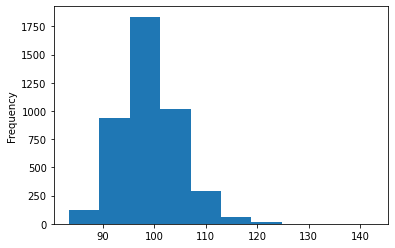

In [42]:
possessionCalculator(df).plot(kind="hist")

In [43]:
poss_Series = possessionCalculator(df)

In [44]:
poss_Series.name = "game_Possessions"

In [45]:
df = pd.concat([df, poss_Series], axis=1)

In [46]:
df[df.game_code == "201811020BRK"]

,team_home,team_away,minutes_played_home,fg_home,fga_home,fg_pct_home,fg3_home,fg3a_home,fg3_pct_home,ft_home,...,def_rtg_away,pf_away,pts_away,home_team_away,home_team_bin_away,game_code,date,NBA_season,playoffs,game_Possessions
156,BRK,HOU,240.0,42.0,85.0,0.494,15.0,34.0,0.441,12.0,...,120.1,21.0,119.0,BRK,False,201811020BRK,2018-11-02,18-19,0,92.411904


### Model 2: Four Factors + Possession Adjustments
    * There is no universally accepted parameter for possessions, but the above function is the way basketball reference tracks possessions (which can be confirmed by comparing the game_Possessions column and their game pace statistic). 
    
    * All possessions should lead to a scoring attempt via a shot (fga or fta), a continuation of the possession (or a possession 'reset' via an offensive rebound) or a change in possession via a turnover or a defensive rebound.
    
    * Having a possession estimate should also help our regression model by feeding in a time variable to better adjust its scoring projections.
        * Since the first model only includes rates, the model assumes that all games have equal time, but for basketball the chance of a tie is more probable due to the frequency of scoring and all ties must be resolved through, in theory, unlimited overtimes until there is no longer one.

In [47]:
model_2_df = df.loc[:, ['efg_pct_home', 'tov_pct_home', 'orb_pct_home', 'fta_per_fga_pct_home', 'pts_home',
          'efg_pct_away', 'tov_pct_away', 'orb_pct_away', 'fta_per_fga_pct_away', 'pts_away', "game_Possessions"]]

In [48]:
home_teams = model_2_df.loc[:, ['efg_pct_home', 'tov_pct_home', 'orb_pct_home', 'fta_per_fga_pct_home', "game_Possessions", 'pts_home']]
away_teams = model_2_df.loc[:, ['efg_pct_away', 'tov_pct_away', 'orb_pct_away', 'fta_per_fga_pct_away', "game_Possessions", 'pts_away']]

In [49]:
home_teams.columns = [col.replace("_home", "") for col in home_teams.columns] 
away_teams.columns = [col.replace("_away", "") for col in away_teams.columns] 

In [50]:
model_ready_df2 = pd.concat([home_teams, away_teams], ignore_index=True)

In [51]:
X = model_ready_df2.loc[:, [col for col in model_ready_df2.columns if col != "pts"]].values
Y = model_ready_df2.loc[:, [col for col in model_ready_df2.columns if col == "pts"]].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=17)

In [53]:
model_2 = LinearRegression(normalize=True)

In [54]:
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [55]:
model_2.score(X_test, y_test)

0.9569022361493797

In [56]:
predictions_2 = model_2.predict(X)

In [57]:
predictions_2_df = pd.DataFrame(zip(Y, predictions_2), columns=["Score", "ŷ"], dtype=np.float64)

In [58]:
predictions_2_df["Mean_Squared_Error"] = ((predictions_2_df["Score"] - predictions_2_df["ŷ"])**2)**.5

In [59]:
predictions_2_df.Mean_Squared_Error.describe()

count    8572.000000
mean        2.084428
std         1.606363
min         0.001483
25%         0.846960
50%         1.720831
75%         2.976572
max        11.148972
Name: Mean_Squared_Error, dtype: float64

<AxesSubplot:>

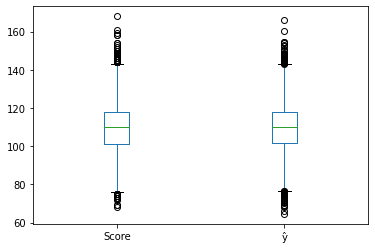

In [60]:
predictions_2_df.plot(y=["Score", "ŷ"], kind="box")

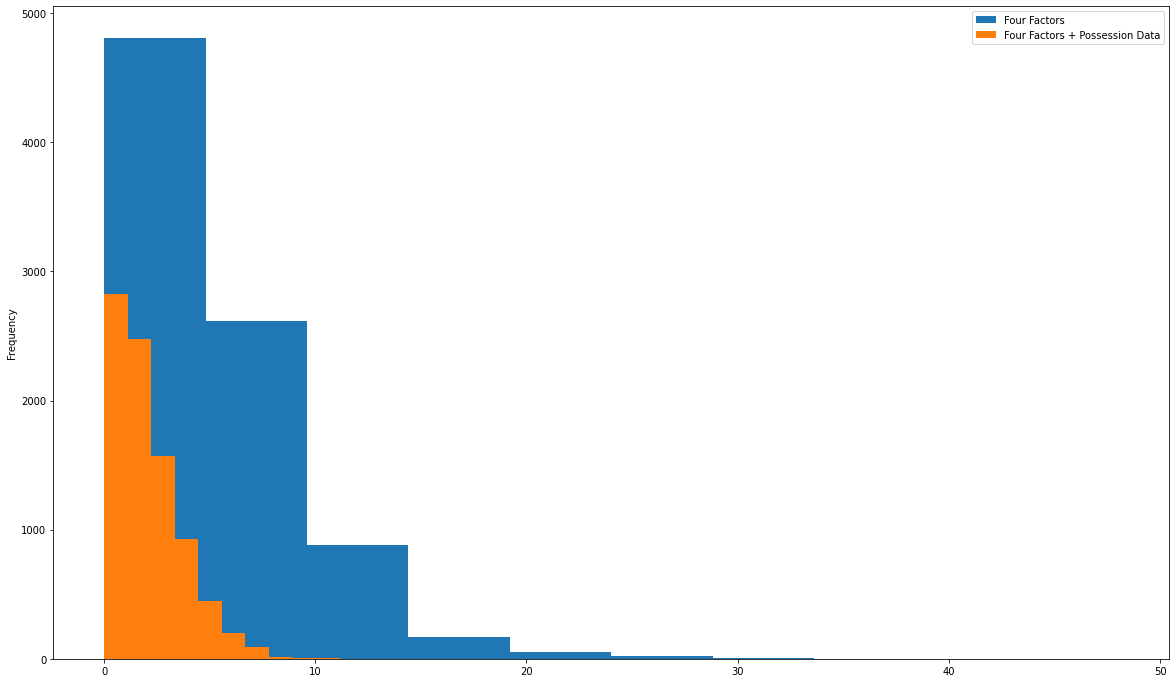

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
predictions.Mean_Squared_Error.plot(kind="hist", ax=ax)
predictions_2_df.Mean_Squared_Error.plot(kind="hist", ax=ax)
ax.legend(["Four Factors", "Four Factors + Possession Data"])

<AxesSubplot:xlabel='Mean_Squared_Error', ylabel='Score'>

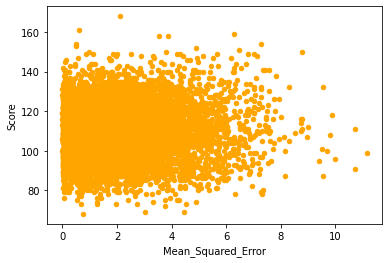

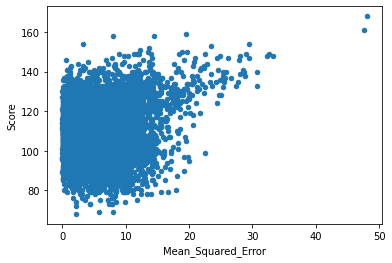

In [62]:
predictions_2_df.plot(kind="scatter", x="Mean_Squared_Error", y="Score", color="orange")
predictions.plot(kind="scatter", x="Mean_Squared_Error", y="Score")

In [63]:
model_ready_df2.corr()

,efg_pct,tov_pct,orb_pct,fta_per_fga_pct,game_Possessions,pts
efg_pct,1.000000,0.119642,-0.057464,-0.017587,0.021385,0.739615
tov_pct,0.119642,1.000000,0.018999,0.097781,0.116983,-0.199721
orb_pct,-0.057464,0.018999,1.000000,0.002877,-0.125327,0.162865
fta_per_fga_pct,-0.017587,0.097781,0.002877,1.000000,0.143227,0.171206
game_Possessions,0.021385,0.116983,-0.125327,0.143227,1.000000,0.455388
pts,0.739615,-0.199721,0.162865,0.171206,0.455388,1.000000


In [64]:
vegas_df = pd.read_csv("../data/interim/vegas_game_by_game_odds.csv")

In [65]:
vegas_df.columns[:100]

Index(['Date_home', 'Location_home', 'Team_home', 'OppTeam_home',
       'TeamId_home', 'GameId_home', 'PercentBet_ML_home', 'Open_Line_ML_home',
       'Pinnacle_ML_home', '5dimes_ML_home', 'Heritage_ML_home',
       'Bovada_ML_home', 'Betonline_ML_home', 'Average_Line_ML_home',
       'Best_Line_ML_home', 'Worst_Line_ML_home', 'PercentBet_Spread_home',
       'Open_Line_Spread_home', 'Open_Odds_Spread_home',
       'Pinnacle_Line_Spread_home', 'Pinnacle_Odds_Spread_home',
       '5dimes_Line_Spread_home', '5dimes_Odds_Spread_home',
       'Heritage_Line_Spread_home', 'Heritage_Odds_Spread_home',
       'Bovada_Line_Spread_home', 'Bovada_Odds_Spread_home',
       'Betonline_Line_Spread_home', 'Betonline_Odds_Spread_home',
       'Average_Line_Spread_home', 'Average_Odds_Spread_home',
       'Best_Line_Spread_home', 'Worst_Line_Spread_home',
       'Best_Odds_Spread_home', 'Worst_Odds_Spread_home', 'PercentBet_OU_home',
       'Open_Line_OU_home', 'Open_Odds_OU_home', 'Pinnacle_Line_OU

In [66]:
home_vegas = vegas_df.loc[:, ['team_abbv_home', 'game_code', "Open_Line_Spread_home", "Average_Line_Spread_home", "Best_Line_Spread_home", "Worst_Line_Spread_home",
                'Open_Line_OU_home', 'Average_Line_OU_home', 'Best_Line_OU_home', 'Worst_Line_OU_home']]
away_vegas = vegas_df.loc[:, ['team_abbv_away', 'game_code', "Open_Line_Spread_away", "Average_Line_Spread_away", "Best_Line_Spread_away", "Worst_Line_Spread_away",
                'Open_Line_OU_away', 'Average_Line_OU_away', 'Best_Line_OU_away', 'Worst_Line_OU_away']]

In [67]:
away_vegas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_abbv_away            2620 non-null   object 
 1   game_code                 2620 non-null   object 
 2   Open_Line_Spread_away     2550 non-null   float64
 3   Average_Line_Spread_away  2620 non-null   float64
 4   Best_Line_Spread_away     2620 non-null   float64
 5   Worst_Line_Spread_away    2620 non-null   float64
 6   Open_Line_OU_away         2524 non-null   float64
 7   Average_Line_OU_away      2620 non-null   float64
 8   Best_Line_OU_away         2620 non-null   float64
 9   Worst_Line_OU_away        2620 non-null   float64
dtypes: float64(8), object(2)
memory usage: 204.8+ KB


In [68]:
home_vegas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team_abbv_home            2620 non-null   object 
 1   game_code                 2620 non-null   object 
 2   Open_Line_Spread_home     2550 non-null   float64
 3   Average_Line_Spread_home  2620 non-null   float64
 4   Best_Line_Spread_home     2620 non-null   float64
 5   Worst_Line_Spread_home    2620 non-null   float64
 6   Open_Line_OU_home         2524 non-null   float64
 7   Average_Line_OU_home      2620 non-null   float64
 8   Best_Line_OU_home         2620 non-null   float64
 9   Worst_Line_OU_home        2620 non-null   float64
dtypes: float64(8), object(2)
memory usage: 204.8+ KB


In [69]:
home_vegas.head()

,team_abbv_home,game_code,Open_Line_Spread_home,Average_Line_Spread_home,Best_Line_Spread_home,Worst_Line_Spread_home,Open_Line_OU_home,Average_Line_OU_home,Best_Line_OU_home,Worst_Line_OU_home
0,GSW,201906130GSW,-3.5,-2.67,-2.5,-3.5,211.0,211.75,212.5,211.0
1,TOR,201906100TOR,-3.0,-1.00,1.0,-3.0,211.5,216.08,217.0,211.5
2,GSW,201906070GSW,-4.5,-4.92,-4.5,-5.0,NaN,215.00,215.5,214.5
3,GSW,201906050GSW,NaN,-1.10,5.5,-3.0,NaN,212.50,218.0,210.0
4,TOR,201906020TOR,-1.5,-2.10,-1.5,-2.5,215.0,214.12,215.0,213.5


In [70]:
away_vegas.head()

,team_abbv_away,game_code,Open_Line_Spread_away,Average_Line_Spread_away,Best_Line_Spread_away,Worst_Line_Spread_away,Open_Line_OU_away,Average_Line_OU_away,Best_Line_OU_away,Worst_Line_OU_away
0,TOR,201906130GSW,3.5,2.67,3.5,2.5,211.0,211.75,212.5,211.0
1,GSW,201906100TOR,3.0,1.00,3.0,-1.0,211.5,216.08,217.0,211.5
2,TOR,201906070GSW,4.5,4.92,5.0,4.5,NaN,215.00,215.5,214.5
3,TOR,201906050GSW,NaN,1.10,3.0,-5.5,NaN,212.50,218.0,210.0
4,GSW,201906020TOR,1.5,2.10,2.5,1.5,215.0,214.12,215.0,213.5


In [71]:
away_vegas["Open_Line_Spread_away"] = away_vegas["Open_Line_Spread_away"].fillna(away_vegas["Average_Line_Spread_away"])
away_vegas["Open_Line_OU_away"] = away_vegas["Open_Line_OU_away"].fillna(away_vegas["Average_Line_OU_away"])

In [72]:
away_vegas.head()

,team_abbv_away,game_code,Open_Line_Spread_away,Average_Line_Spread_away,Best_Line_Spread_away,Worst_Line_Spread_away,Open_Line_OU_away,Average_Line_OU_away,Best_Line_OU_away,Worst_Line_OU_away
0,TOR,201906130GSW,3.5,2.67,3.5,2.5,211.0,211.75,212.5,211.0
1,GSW,201906100TOR,3.0,1.00,3.0,-1.0,211.5,216.08,217.0,211.5
2,TOR,201906070GSW,4.5,4.92,5.0,4.5,215.0,215.00,215.5,214.5
3,TOR,201906050GSW,1.1,1.10,3.0,-5.5,212.5,212.50,218.0,210.0
4,GSW,201906020TOR,1.5,2.10,2.5,1.5,215.0,214.12,215.0,213.5


In [73]:
home_vegas["Open_Line_Spread_home"] = home_vegas["Open_Line_Spread_home"].fillna(home_vegas["Average_Line_Spread_home"])
home_vegas["Open_Line_OU_home"] = home_vegas["Open_Line_OU_home"].fillna(home_vegas["Average_Line_OU_home"])

In [74]:
# Create Open, Average and Worst Score Projections for each team based on their associated pairs of Over/Under Projections and Spread Projections

In [75]:
home_vegas["Open_Score_Projection"] = (home_vegas["Open_Line_OU_home"]/2) + (-1 * home_vegas["Open_Line_Spread_home"])
away_vegas["Open_Score_Projection"] = (away_vegas["Open_Line_OU_away"]/2) + (-1 * away_vegas["Open_Line_Spread_away"])

home_vegas["Avg_Score_Projection"] = (home_vegas["Average_Line_OU_home"]/2) + (-1 * home_vegas["Average_Line_Spread_home"])
away_vegas["Avg_Score_Projection"] = (away_vegas["Average_Line_OU_away"]/2) + (-1 * away_vegas["Average_Line_Spread_away"])

home_vegas["Best_Score_Projection"] = (home_vegas["Best_Line_OU_home"]/2) + (-1 * home_vegas["Best_Line_Spread_home"])
away_vegas["Best_Score_Projection"] = (away_vegas["Best_Line_OU_away"]/2) + (-1 * away_vegas["Best_Line_Spread_away"])

home_vegas["Worst_Score_Projection"] = (home_vegas["Worst_Line_OU_home"]/2) + (-1 * home_vegas["Worst_Line_Spread_home"])
away_vegas["Worst_Score_Projection"] = (away_vegas["Worst_Line_OU_away"]/2) + (-1 * away_vegas["Worst_Line_Spread_away"])

In [76]:
home_vegas

,team_abbv_home,game_code,Open_Line_Spread_home,Average_Line_Spread_home,Best_Line_Spread_home,Worst_Line_Spread_home,Open_Line_OU_home,Average_Line_OU_home,Best_Line_OU_home,Worst_Line_OU_home,Open_Score_Projection,Avg_Score_Projection,Best_Score_Projection,Worst_Score_Projection
0,GSW,201906130GSW,-3.5,-2.67,-2.5,-3.5,211.0,211.75,212.5,211.0,109.00,108.545,108.75,109.00
1,TOR,201906100TOR,-3.0,-1.00,1.0,-3.0,211.5,216.08,217.0,211.5,108.75,109.040,107.50,108.75
2,GSW,201906070GSW,-4.5,-4.92,-4.5,-5.0,215.0,215.00,215.5,214.5,112.00,112.420,112.25,112.25
3,GSW,201906050GSW,-1.1,-1.10,5.5,-3.0,212.5,212.50,218.0,210.0,107.35,107.350,103.50,108.00
4,TOR,201906020TOR,-1.5,-2.10,-1.5,-2.5,215.0,214.12,215.0,213.5,109.00,109.160,109.00,109.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2615,ORL,201710180ORL,2.5,3.42,4.0,2.5,207.0,205.67,207.0,205.0,101.00,99.415,99.50,100.00
2616,IND,201710180IND,-5.0,-3.33,-3.0,-5.0,212.5,216.00,217.0,212.5,111.25,111.330,111.50,111.25
2617,DET,201710180DET,-3.5,-2.92,-2.5,-3.5,203.0,202.17,203.0,202.0,105.00,104.005,104.00,104.50
2618,GSW,201710170GSW,-9.0,-9.42,-9.0,-9.5,235.0,231.75,235.0,230.5,126.50,125.295,126.50,124.75


In [77]:
proj_home = home_vegas.loc[:, ['team_abbv_home', 'game_code', 'Open_Score_Projection',
       'Avg_Score_Projection', 'Best_Score_Projection', 'Worst_Score_Projection']]

In [78]:
proj_away = away_vegas.loc[:, ['team_abbv_away', 'game_code', 'Open_Score_Projection',
       'Avg_Score_Projection', 'Best_Score_Projection', 'Worst_Score_Projection']]

In [79]:
proj_home.rename(columns={"team_abbv_home": "team"}, inplace=True)
proj_away.rename(columns={"team_abbv_away": "team"}, inplace=True)

In [80]:
proj_home.columns == proj_away.columns

array([ True,  True,  True,  True,  True,  True])

In [81]:
vegas_projections = pd.concat([proj_home, proj_away], axis=0, ignore_index=True)

In [82]:
df_3 = df.loc[:, ["team_home", 'efg_pct_home', 'tov_pct_home', 'orb_pct_home', 'fta_per_fga_pct_home', 'pts_home',
          "team_away", 'efg_pct_away', 'tov_pct_away', 'orb_pct_away', 'fta_per_fga_pct_away', 'pts_away', "game_Possessions", "game_code", "date", "NBA_season"]]

In [83]:
home_teams = df_3.loc[:, ["team_home", 'efg_pct_home', 'tov_pct_home', 'orb_pct_home', 'fta_per_fga_pct_home', "game_Possessions", "game_code", "date", "NBA_season",'pts_home']]
away_teams = df_3.loc[:, ["team_away", 'efg_pct_away', 'tov_pct_away', 'orb_pct_away', 'fta_per_fga_pct_away', "game_Possessions", "game_code", "date", "NBA_season", 'pts_away']]

In [84]:
home_teams.columns = [col.replace("_home", "") for col in home_teams.columns] 
away_teams.columns = [col.replace("_away", "") for col in away_teams.columns] 

In [85]:
df_3_with_gamecodes = pd.concat([home_teams, away_teams], ignore_index=True)

In [86]:
df_3_with_gamecodes

,team,efg_pct,tov_pct,orb_pct,fta_per_fga_pct,game_Possessions,game_code,date,NBA_season,pts
0,TOR,0.544,10.7,26.1,0.220,100.721685,201810260TOR,2018-10-26,18-19,116.0
1,TOR,0.538,10.7,26.7,0.207,97.780277,201810190TOR,2018-10-19,18-19,113.0
2,TOR,0.565,8.2,18.6,0.217,100.326146,201810170TOR,2018-10-17,18-19,116.0
3,TOR,0.661,12.2,15.6,0.161,100.180849,201810220TOR,2018-10-22,18-19,127.0
4,TOR,0.579,14.5,28.2,0.135,97.328553,201810240TOR,2018-10-24,18-19,112.0
...,...,...,...,...,...,...,...,...,...,...
8567,OKC,0.506,14.2,18.4,0.306,101.943980,202103040SAS,2021-03-04,20-21,107.0
8568,MIL,0.495,13.3,25.0,0.232,104.204196,202103040MEM,2021-03-04,20-21,112.0
8569,DET,0.575,12.2,14.6,0.188,90.619714,202103040NYK,2021-03-04,20-21,104.0
8570,SAC,0.529,6.0,36.0,0.155,95.526029,202103040POR,2021-03-04,20-21,119.0


In [87]:
vegas_and_features = pd.merge(df_3_with_gamecodes, vegas_projections, "inner", on=["game_code", "team"])

In [88]:
vegas_and_features["Model_Proj"] = pd.Series(model_2.predict(vegas_and_features.iloc[:, 1:6].values).reshape(-1))

In [91]:
vegas_and_features["Model_1_Proj"] = pd.Series(model_1.predict(vegas_and_features.iloc[:, 1:5].values).reshape(-1))

In [92]:
vegas_and_features

,team,efg_pct,tov_pct,orb_pct,fta_per_fga_pct,game_Possessions,game_code,date,NBA_season,pts,Open_Score_Projection,Avg_Score_Projection,Best_Score_Projection,Worst_Score_Projection,Model_Proj,Model_1_Proj
0,TOR,0.544,10.7,26.1,0.220,100.721685,201810260TOR,2018-10-26,18-19,116.0,125.00,122.635,125.00,122.00,117.414660,114.618943
1,TOR,0.538,10.7,26.7,0.207,97.780277,201810190TOR,2018-10-19,18-19,113.0,106.25,107.460,107.50,106.75,113.304493,113.522953
2,TOR,0.565,8.2,18.6,0.217,100.326146,201810170TOR,2018-10-17,18-19,116.0,118.50,119.790,119.25,119.50,119.860570,117.903629
3,TOR,0.661,12.2,15.6,0.161,100.180849,201810220TOR,2018-10-22,18-19,127.0,119.50,120.755,121.00,119.50,126.298426,125.223107
4,TOR,0.579,14.5,28.2,0.135,97.328553,201810240TOR,2018-10-24,18-19,112.0,121.00,121.670,121.50,121.50,113.134292,113.764999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,CHO,0.459,16.5,7.3,0.397,98.480863,201710180DET,2017-10-18,17-18,90.0,98.00,98.165,98.00,98.50,88.054560,92.549689
5072,LAL,0.484,12.6,31.9,0.234,99.468812,201712220GSW,2017-12-22,17-18,106.0,98.50,96.830,96.50,98.00,107.360883,105.656205
5073,CLE,0.582,9.3,19.4,0.329,97.237820,201804090NYK,2018-04-09,17-18,123.0,123.75,123.125,123.75,123.00,120.283856,122.924313
5074,NYK,0.522,15.0,21.3,0.180,97.641305,201803020LAC,2018-03-02,17-18,105.0,105.25,104.625,104.50,105.25,101.469414,102.992668


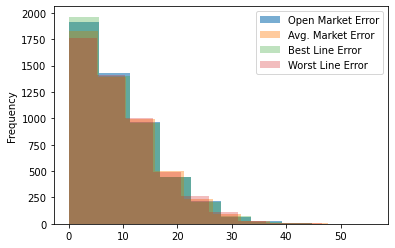

In [90]:
vegas_and_features.assign(open_error = lambda x: ((x.pts - x.Open_Score_Projection)**2)**.5).open_error.plot(kind="hist", alpha=.6)
vegas_and_features.assign(avg_error = lambda x: ((x.pts - x.Avg_Score_Projection)**2)**.5).avg_error.plot(kind="hist", alpha=.4)
vegas_and_features.assign(best_error = lambda x: ((x.pts - x.Best_Score_Projection)**2)**.5).best_error.plot(kind="hist", alpha=.3)
vegas_and_features.assign(worst_error = lambda x: ((x.pts - x.Worst_Score_Projection)**2)**.5).worst_error.plot(kind="hist", alpha=.3)
plt.legend(["Open Market Error", "Avg. Market Error", "Best Line Error", "Worst Line Error"])

In [ ]:
# Currently: We have a Good Model knowing the end result of Four Factors and a Possessions Estimate. 
# Just knowing the Four Factors provides us with a similar residual spread of the market.
# Can We use past Possession data as well as Four Factors of a team's recent games to better project the game in question.
# The main mathematical goal here will be to achieve a residuial mean smaller than that of the markets so that over time, we known our model in the long run better predict the score than the market.

In [102]:
df.groupby("playoffs").mean().loc[:, ["efg_pct_home", "efg_pct_away", "tov_pct_home", "tov_pct_away", "orb_pct_home", "orb_pct_away", "fta_per_fga_pct_home", "fta_per_fga_pct_away", "fta_home", "fta_away", "pts_home", "pts_away", "game_Possessions"]]

,efg_pct_home,efg_pct_away,tov_pct_home,tov_pct_away,orb_pct_home,orb_pct_away,fta_per_fga_pct_home,fta_per_fga_pct_away,fta_home,fta_away,pts_home,pts_away,game_Possessions
playoffs,,,,,,,,,,,,,
0,0.532478,0.522458,12.239955,12.240750,22.786218,21.930221,0.262840,0.254788,22.840079,22.196921,111.057114,108.942389,99.250215
1,0.525780,0.515622,11.444015,12.311583,22.222008,20.571042,0.283699,0.273104,24.100386,22.918919,109.096525,105.305019,97.075137


In [106]:
df_3

,team_home,efg_pct_home,tov_pct_home,orb_pct_home,fta_per_fga_pct_home,pts_home,team_away,efg_pct_away,tov_pct_away,orb_pct_away,fta_per_fga_pct_away,pts_away,game_Possessions,game_code,date,NBA_season
0,TOR,0.544,10.7,26.1,0.220,116.0,DAL,0.478,12.0,20.8,0.261,107.0,100.721685,201810260TOR,2018-10-26,18-19
1,TOR,0.538,10.7,26.7,0.207,113.0,BOS,0.475,11.9,30.2,0.101,101.0,97.780277,201810190TOR,2018-10-19,18-19
2,TOR,0.565,8.2,18.6,0.217,116.0,CLE,0.441,13.5,28.6,0.459,104.0,100.326146,201810170TOR,2018-10-17,18-19
3,TOR,0.661,12.2,15.6,0.161,127.0,CHO,0.469,10.3,25.5,0.186,106.0,100.180849,201810220TOR,2018-10-22,18-19
4,TOR,0.579,14.5,28.2,0.135,112.0,MIN,0.495,12.7,32.7,0.167,105.0,97.328553,201810240TOR,2018-10-24,18-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,SAS,0.529,17.4,14.3,0.141,102.0,OKC,0.506,14.2,18.4,0.306,107.0,101.943980,202103040SAS,2021-03-04,20-21
4282,MEM,0.436,9.7,30.4,0.238,111.0,MIL,0.495,13.3,25.0,0.232,112.0,104.204196,202103040MEM,2021-03-04,20-21
4283,NYK,0.596,12.5,34.3,0.229,114.0,DET,0.575,12.2,14.6,0.188,104.0,90.619714,202103040NYK,2021-03-04,20-21
4284,POR,0.563,7.5,21.4,0.284,123.0,SAC,0.529,6.0,36.0,0.155,119.0,95.526029,202103040POR,2021-03-04,20-21


<h2 style="color: orange">Comparing Lines, Over/Unders and Bookies with Our 2nd Model</h2>

<ul><b>Givens</b>
    <li>Total Projections (over/under), Game Projections (spread) and Winning Projections (moneyline)</li>
    <li>We have these metrics from 5 offshore Betting Houses: Pinnacle, 5Dimes, Hertiage, Bovada and Betonline</li>
    <li>From this information we have a given opening line for each projection, an average metric aggregating the book's individual numbers and both a min/max showing the best and worst line for a specific team for a specific game</li>
    <li>From this information and our associated compiled model, we can then: backtest our model strategy with the true market rates at each book and compute the losses and winning we would've taken given which side of the spread we fall on</li>
</ul>

In [114]:
vegas_df.columns[:66]

Index(['Date_home', 'Location_home', 'Team_home', 'OppTeam_home',
       'TeamId_home', 'GameId_home', 'PercentBet_ML_home', 'Open_Line_ML_home',
       'Pinnacle_ML_home', '5dimes_ML_home', 'Heritage_ML_home',
       'Bovada_ML_home', 'Betonline_ML_home', 'Average_Line_ML_home',
       'Best_Line_ML_home', 'Worst_Line_ML_home', 'PercentBet_Spread_home',
       'Open_Line_Spread_home', 'Open_Odds_Spread_home',
       'Pinnacle_Line_Spread_home', 'Pinnacle_Odds_Spread_home',
       '5dimes_Line_Spread_home', '5dimes_Odds_Spread_home',
       'Heritage_Line_Spread_home', 'Heritage_Odds_Spread_home',
       'Bovada_Line_Spread_home', 'Bovada_Odds_Spread_home',
       'Betonline_Line_Spread_home', 'Betonline_Odds_Spread_home',
       'Average_Line_Spread_home', 'Average_Odds_Spread_home',
       'Best_Line_Spread_home', 'Worst_Line_Spread_home',
       'Best_Odds_Spread_home', 'Worst_Odds_Spread_home', 'PercentBet_OU_home',
       'Open_Line_OU_home', 'Open_Odds_OU_home', 'Pinnacle_Line_OU

In [125]:
df_3.head()

,team_home,efg_pct_home,tov_pct_home,orb_pct_home,fta_per_fga_pct_home,pts_home,team_away,efg_pct_away,tov_pct_away,orb_pct_away,fta_per_fga_pct_away,pts_away,game_Possessions,game_code,date,NBA_season
0,TOR,0.544,10.7,26.1,0.220,116.0,DAL,0.478,12.0,20.8,0.261,107.0,100.721685,201810260TOR,2018-10-26,18-19
1,TOR,0.538,10.7,26.7,0.207,113.0,BOS,0.475,11.9,30.2,0.101,101.0,97.780277,201810190TOR,2018-10-19,18-19
2,TOR,0.565,8.2,18.6,0.217,116.0,CLE,0.441,13.5,28.6,0.459,104.0,100.326146,201810170TOR,2018-10-17,18-19
3,TOR,0.661,12.2,15.6,0.161,127.0,CHO,0.469,10.3,25.5,0.186,106.0,100.180849,201810220TOR,2018-10-22,18-19
4,TOR,0.579,14.5,28.2,0.135,112.0,MIN,0.495,12.7,32.7,0.167,105.0,97.328553,201810240TOR,2018-10-24,18-19


In [ ]:
# pick a gambling metric: over/under, moneyline, spread or all-of-them
# pick a book: Pinnacle, 5Dimes, Heritage, Bovada and Betonline
# feed into func: projection, game_code, and team <- you have already run the model.


In [137]:
home_model_Xs = df_3.loc[:, ["efg_pct_home", "tov_pct_home", "orb_pct_home", "fta_per_fga_pct_home", "game_Possessions"]]

In [138]:
away_model_Xs = df_3.loc[:, ["efg_pct_away", "tov_pct_away", "orb_pct_away", "fta_per_fga_pct_away", "game_Possessions"]]

In [143]:
df_4 = df_3.copy(deep=True)

In [144]:
df_4["Model_2_Proj_home"] = pd.Series(model_2.predict(home_model_Xs.values).reshape(-1))

In [145]:
df_4["Model_2_Proj_away"] = pd.Series(model_2.predict(away_model_Xs.values).reshape(-1))

In [147]:
df_4["Model_1_Proj_home"] = pd.Series(model_1.predict(home_model_Xs.iloc[:, :-1].values).reshape(-1))
df_4["Model_1_Proj_away"] = pd.Series(model_1.predict(away_model_Xs.iloc[:, :-1].values).reshape(-1))

In [148]:
df_4

,team_home,efg_pct_home,tov_pct_home,orb_pct_home,fta_per_fga_pct_home,pts_home,team_away,efg_pct_away,tov_pct_away,orb_pct_away,fta_per_fga_pct_away,pts_away,game_Possessions,game_code,date,NBA_season,Model_2_Proj_home,Model_2_Proj_away,Model_1_Proj_home,Model_1_Proj_away
0,TOR,0.544,10.7,26.1,0.220,116.0,DAL,0.478,12.0,20.8,0.261,107.0,100.721685,201810260TOR,2018-10-26,18-19,117.414660,103.632042,114.618943,101.982786
1,TOR,0.538,10.7,26.7,0.207,113.0,BOS,0.475,11.9,30.2,0.101,101.0,97.780277,201810190TOR,2018-10-19,18-19,113.304493,101.505988,113.522953,100.422423
2,TOR,0.565,8.2,18.6,0.217,116.0,CLE,0.441,13.5,28.6,0.459,104.0,100.326146,201810170TOR,2018-10-17,18-19,119.860570,103.404787,117.903629,103.405539
3,TOR,0.661,12.2,15.6,0.161,127.0,CHO,0.469,10.3,25.5,0.186,106.0,100.180849,201810220TOR,2018-10-22,18-19,126.298426,104.819077,125.223107,102.159775
4,TOR,0.579,14.5,28.2,0.135,112.0,MIN,0.495,12.7,32.7,0.167,105.0,97.328553,201810240TOR,2018-10-24,18-19,113.134292,105.597021,113.764999,105.534763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,SAS,0.529,17.4,14.3,0.141,102.0,OKC,0.506,14.2,18.4,0.306,107.0,101.943980,202103040SAS,2021-03-04,20-21,99.621607,105.960883,97.339651,104.146030
4282,MEM,0.436,9.7,30.4,0.238,111.0,MIL,0.495,13.3,25.0,0.232,112.0,104.204196,202103040MEM,2021-03-04,20-21,108.493323,109.769370,101.194132,103.815776
4283,NYK,0.596,12.5,34.3,0.229,114.0,DET,0.575,12.2,14.6,0.188,104.0,90.619714,202103040NYK,2021-03-04,20-21,116.174745,102.638723,123.991252,112.259925
4284,POR,0.563,7.5,21.4,0.284,123.0,SAC,0.529,6.0,36.0,0.155,119.0,95.526029,202103040POR,2021-03-04,20-21,118.051791,119.550319,121.530157,119.754287


In [154]:
vegas_df.iloc[:, :60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date_home                   2620 non-null   object 
 1   Location_home               2620 non-null   object 
 2   Team_home                   2620 non-null   object 
 3   OppTeam_home                2620 non-null   object 
 4   TeamId_home                 2620 non-null   int64  
 5   GameId_home                 2620 non-null   int64  
 6   PercentBet_ML_home          2620 non-null   float64
 7   Open_Line_ML_home           2549 non-null   float64
 8   Pinnacle_ML_home            2570 non-null   float64
 9   5dimes_ML_home              2571 non-null   float64
 10  Heritage_ML_home            2564 non-null   float64
 11  Bovada_ML_home              2563 non-null   float64
 12  Betonline_ML_home           2569 non-null   float64
 13  Average_Line_ML_home        2620 

In [253]:
vegas_df.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team_abbv_home              2620 non-null   object 
 1   game_code                   2620 non-null   object 
 2   Date_away                   2620 non-null   object 
 3   Location_away               2620 non-null   object 
 4   Team_away                   2620 non-null   object 
 5   OppTeam_away                2620 non-null   object 
 6   TeamId_away                 2620 non-null   int64  
 7   GameId_away                 2620 non-null   int64  
 8   PercentBet_ML_away          2620 non-null   float64
 9   Open_Line_ML_away           2549 non-null   float64
 10  Pinnacle_ML_away            2570 non-null   float64
 11  5dimes_ML_away              2571 non-null   float64
 12  Heritage_ML_away            2564 non-null   float64
 13  Bovada_ML_away              2563 

In [167]:
vegas_df.loc[:,["Spread_home"]] = vegas_df.loc[:,["Spread_home"]] * -1
vegas_df.loc[:,["Spread_away"]] = vegas_df.loc[:,["Spread_away"]] * -1

In [275]:
vegas_df2 = vegas_df.copy(deep=True)

In [291]:
def bfill():
    # look to see if column is nan and associated away column is nan
    pat = re.compile("5dimes|Bovada|Betonline|Heritage|Pinnacle|Open")
    books = ["5dimes", "Heritage", "Bovada", "Pinnacle", "Betonline", "Open"]
    types = ["Line", "Odds"]
    team_types = ["home", "away"]
    number_types = ["Spread", "OU", "ML"]
    # fillna with associated average column
    columns = []
    for b in books:
        for t in types:
            for n in number_types:
                for y in team_types:
                    if n == "ML":
                        columns.append(b+ "_"+ n +"_" + y)
                    else:
                        columns.append(b+"_"+ t +"_"+ n +"_" + y)
    
    for i, row in vegas_df2.iterrows():
        for c in columns:
            if np.isnan(row[c]) and ~(np.isnan(row[c.replace("home", "away")])):
                vegas_df2.loc[i, c] = vegas_df2.loc[i, c.replace("home", "away")]
            elif np.isnan(row[c]) and (np.isnan(row[c.replace("home", "away")])):
                vegas_df2.loc[i, c] = vegas_df2.loc[i, c.replace(re.match(pat, c)[0], "Average")]  
            else:
                next
    
    return columns
    # do for all columns

In [290]:
vegas_df2 = vegas_df2.rename(columns={"Average_Line_ML_home": "Average_ML_home", "Best_Line_ML_home": "Best_ML_home", "Worst_Line_ML_home": "Worst_ML_home",
                         "Average_Line_ML_away": "Average_ML_away", "Best_Line_ML_away": "Best_ML_away", "Worst_Line_ML_away": "Worst_ML_away",
                                     "Open_Line_ML_away": "Open_ML_away", "Open_Line_ML_home": "Open_ML_home"})

In [283]:
vegas_df2.loc[1384, ["5dimes_Line_OU_home", "5dimes_Odds_OU_home", "5dimes_Line_OU_away", "5dimes_Odds_OU_away"]]

5dimes_Line_OU_home    208.5
5dimes_Odds_OU_home     -105
5dimes_Line_OU_away    208.5
5dimes_Odds_OU_away     -105
Name: 1384, dtype: object

In [292]:
bfill()

['5dimes_Line_Spread_home',
 '5dimes_Line_Spread_away',
 '5dimes_Line_OU_home',
 '5dimes_Line_OU_away',
 '5dimes_ML_home',
 '5dimes_ML_away',
 '5dimes_Odds_Spread_home',
 '5dimes_Odds_Spread_away',
 '5dimes_Odds_OU_home',
 '5dimes_Odds_OU_away',
 '5dimes_ML_home',
 '5dimes_ML_away',
 'Heritage_Line_Spread_home',
 'Heritage_Line_Spread_away',
 'Heritage_Line_OU_home',
 'Heritage_Line_OU_away',
 'Heritage_ML_home',
 'Heritage_ML_away',
 'Heritage_Odds_Spread_home',
 'Heritage_Odds_Spread_away',
 'Heritage_Odds_OU_home',
 'Heritage_Odds_OU_away',
 'Heritage_ML_home',
 'Heritage_ML_away',
 'Bovada_Line_Spread_home',
 'Bovada_Line_Spread_away',
 'Bovada_Line_OU_home',
 'Bovada_Line_OU_away',
 'Bovada_ML_home',
 'Bovada_ML_away',
 'Bovada_Odds_Spread_home',
 'Bovada_Odds_Spread_away',
 'Bovada_Odds_OU_home',
 'Bovada_Odds_OU_away',
 'Bovada_ML_home',
 'Bovada_ML_away',
 'Pinnacle_Line_Spread_home',
 'Pinnacle_Line_Spread_away',
 'Pinnacle_Line_OU_home',
 'Pinnacle_Line_OU_away',
 'Pinnacle_M

In [294]:
vegas_df2.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team_abbv_home              2620 non-null   object 
 1   game_code                   2620 non-null   object 
 2   Date_away                   2620 non-null   object 
 3   Location_away               2620 non-null   object 
 4   Team_away                   2620 non-null   object 
 5   OppTeam_away                2620 non-null   object 
 6   TeamId_away                 2620 non-null   int64  
 7   GameId_away                 2620 non-null   int64  
 8   PercentBet_ML_away          2620 non-null   float64
 9   Open_ML_away                2620 non-null   float64
 10  Pinnacle_ML_away            2620 non-null   float64
 11  5dimes_ML_away              2620 non-null   float64
 12  Heritage_ML_away            2620 non-null   float64
 13  Bovada_ML_away              2620 

In [299]:
df_4["Model_2_Proj_Spread"] = (df_4["Model_2_Proj_home"] - df_4["Model_2_Proj_away"]) * -1
df_4["Model_1_Proj_Spread"] = (df_4["Model_1_Proj_home"] - df_4["Model_1_Proj_away"]) * -1

In [301]:
df_4.loc[:, ["team_home", "team_away", "game_code", "Model_2_Proj_Spread", "Model_1_Proj_Spread"]]

,team_home,team_away,game_code,Model_2_Proj_Spread,Model_1_Proj_Spread
0,TOR,DAL,201810260TOR,-13.782619,-12.636158
1,TOR,BOS,201810190TOR,-11.798505,-13.100530
2,TOR,CLE,201810170TOR,-16.455783,-14.498091
3,TOR,CHO,201810220TOR,-21.479349,-23.063333
4,TOR,MIN,201810240TOR,-7.537271,-8.230236
...,...,...,...,...,...
4281,SAS,OKC,202103040SAS,6.339276,6.806379
4282,MEM,MIL,202103040MEM,1.276048,2.621644
4283,NYK,DET,202103040NYK,-13.536022,-11.731327
4284,POR,SAC,202103040POR,1.498528,-1.775870


In [169]:
def backTestVegas(decision_rule, teams, model):
    # Create a function to Systematically Compare Given Models to the data we have right now
    # decision_rule = model_home-model_away :: if < Spread -> Win else Loss
    # df_3 = all data with appropiate metrics
    # vegas_df2 = all data for 17-18 and 18-19 with all gambling metrics
    # merge the two based on the func args and return the appropiate winning %, gambling winnings(or losses) based on the model
    pd.merge()
    
    
    return None

In [307]:
vegas_df2.loc[:, ["team_abbv_home", "Open_Line_Spread_home", "Pinnacle_Line_Spread_home", "5dimes_Line_Spread_home", "Heritage_Line_Spread_home", "Bovada_Line_Spread_home", "Betonline_Line_Spread_home",
                 "Average_Line_Spread_home", "Best_Line_Spread_home", "Worst_Line_Spread_home", "Spread_home"]]

,team_abbv_home,Open_Line_Spread_home,Pinnacle_Line_Spread_home,5dimes_Line_Spread_home,Heritage_Line_Spread_home,Bovada_Line_Spread_home,Betonline_Line_Spread_home,Average_Line_Spread_home,Best_Line_Spread_home,Worst_Line_Spread_home,Spread_home
0,GSW,-3.5,-2.5,-2.5,-2.5,-2.5,-2.5,-2.67,-2.5,-3.5,4.0
1,TOR,-3.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.00,1.0,-3.0,1.0
2,GSW,-4.5,-5.0,-5.0,-5.0,-5.0,-5.0,-4.92,-4.5,-5.0,13.0
3,GSW,-1.1,-2.5,5.5,-2.5,-3.0,-3.0,-1.10,5.5,-3.0,14.0
4,TOR,-1.5,-2.5,-2.0,-2.1,-2.0,-2.5,-2.10,-1.5,-2.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2615,ORL,2.5,3.5,3.5,3.5,4.0,3.5,3.42,4.0,2.5,-7.0
2616,IND,-5.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.33,-3.0,-5.0,-9.0
2617,DET,-3.5,-3.0,-3.0,-2.5,-3.0,-2.5,-2.92,-2.5,-3.5,-12.0
2618,GSW,-9.0,-9.5,-9.5,-9.5,-9.5,-9.5,-9.42,-9.0,-9.5,1.0


In [314]:
new_S = (vegas_df2["Open_Line_Spread_home"] < vegas_df2["Spread_home"])

In [370]:
def betEval(spread, result, rules):
    '''
    spread: -2.5 result: -4 -> WIN : -2.5 > -4
    spread: +2.5 result: -4 -> WIN : 2.5 > -4
    spread: +2.5 result: +1 -> WIN : 2.5 > 1
    -----------------------------------------
    spread: +2.5 result: +19 -> LOSS: 2.5 < 19
    spread: -2.5 result: +4 -> LOSS: -2.5 < 4
    spread: -2.5 result: -1 -> LOSS: -2.5 < -1

    Thus,
    when spread > result, win; else, loss.

    args: [spread, result,  *decision number] -> unit array based on given decision rules (spread and decision number) + unit array based on ground truth (spread and result)
      compare and then return appropiate array of whether the appropiate decision rule resulted in a win. 

    '''
    # 1 represents a selection of the home team by the decision rule; 0, the away team  
    
    books = spread < result
    covers = spread < rules
    
    return (books == covers).astype(int)

In [361]:
# We have a multitude of Spreads split up into 2 Categories:
    # 1. Aggregate Spreads: Best and Worst (Max and min), Average Spread and Opening Spread (the initial line)
    # 2. Actual Books Spread with their corresponding Lines: How many points they are giving and the cost for that line

In [331]:
df_5_with_model_spreads = df_4.loc[:, ["team_home", "team_away", "game_code", "Model_2_Proj_Spread", "Model_1_Proj_Spread"]]

In [333]:
vegas_with_decisions = pd.merge(vegas_df2, df_5_with_model_spreads, left_on=["team_abbv_home", "game_code"], right_on=["team_home", "game_code"])

In [372]:
betEval(vegas_with_decisions.Best_Line_Spread_home, vegas_with_decisions.Spread_home, vegas_with_decisions.Model_2_Proj_Spread)

0       1
1       1
2       1
3       1
4       1
       ..
2533    1
2534    1
2535    1
2536    1
2537    1
Length: 2538, dtype: int32

In [369]:
vegas_with_decisions.loc[:, ["team_abbv_home", "Best_Line_Spread_home", "Spread_home", "Model_2_Proj_Spread", "Model_1_Proj_Spread", "team_abbv_away"]]

,team_abbv_home,Best_Line_Spread_home,Spread_home,Model_2_Proj_Spread,Model_1_Proj_Spread,team_abbv_away
0,GSW,-2.5,4.0,3.259102,2.628310,TOR
1,TOR,1.0,1.0,0.842859,1.577135,GSW
2,GSW,-4.5,13.0,6.011951,4.936630,TOR
3,GSW,5.5,14.0,16.015943,17.243643,TOR
4,TOR,-1.5,5.0,8.027228,10.196330,GSW
...,...,...,...,...,...,...
2533,ORL,4.0,-7.0,-10.115578,-11.568265,MIA
2534,IND,-3.0,-9.0,-12.054915,-10.307102,BRK
2535,DET,-2.5,-12.0,-14.314911,-8.865264,CHO
2536,GSW,-9.0,1.0,-1.649867,-4.301992,HOU
